# Dealing with nonlinear relationships using random forests and Decision tree Regressor
Load Data

In [1]:
from sklearn import datasets
import pandas as pd
housing=datasets.load_boston()
x=housing.data
y=housing.target
X=pd.DataFrame(x,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM',
                          'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
Y=pd.DataFrame(y,columns=['MEDV'])
data=pd.concat([X,Y],axis=1)
print(data.head())
print()
print('Data Shape: ',data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Data Shape:  (506, 14)


# Decison Tree Regression

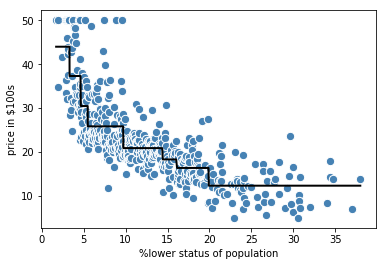

In [3]:
X=data[['LSTAT']].values
y=data[['MEDV']].values
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)
    return None

tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx=X.flatten().argsort()
lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel('%lower status of population')
plt.ylabel('price in $100s')
plt.show()

# Random forest regression

In [5]:
X=data.iloc[:,:-1].values
y=data['MEDV'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.4,random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000,
                             criterion='mse',random_state=1,
                             n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)
from sklearn.metrics import mean_squared_error
t_train=mean_squared_error(y_train,y_train_pred)
t_test=mean_squared_error(y_test,y_test_pred)
print('MSE Train: %.3f, MSE test: %.3f'%(t_train,t_test))
##
from sklearn.metrics import r2_score
t_train1=r2_score(y_train,y_train_pred)
t_test1=r2_score(y_test,y_test_pred)
print('MSE Train: %.3f, MSE test: %.3f'%(t_train1,t_test1))


MSE Train: 1.641, MSE test: 11.056
MSE Train: 0.979, MSE test: 0.878


# Let us also take a look at the residuals of the prediction

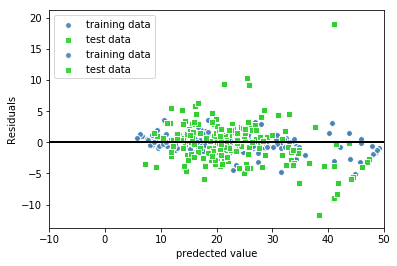

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',
            edgecolor='white',marker='o',s=35,alpha=0.9,label='training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',
            edgecolor='white',marker='s',s=45,alpha=0.9,label='test data')
plt.xlabel('predected value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.show()
